In [44]:
# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Print 4 images in a row
'''plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()'''

'plt.figure(figsize=(10, 5))\nfor i in range(4):\n    plt.subplot(1, 4, i+1)\n    plt.imshow(X_train[i], cmap=\'gray\')\n    plt.title(f"Label: {y_train[i]}")\n    plt.axis(\'off\')\nplt.tight_layout()'

In [88]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


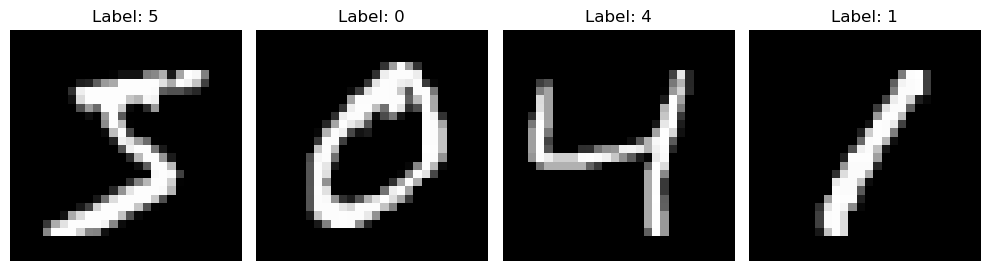

In [90]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Print 4 images in a row
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [92]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

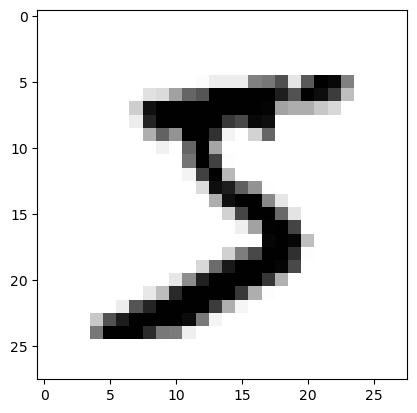

In [94]:
plt.imshow(X_train[0], cmap='binary')

In [96]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap = 'binary')
    plt.title(f"Label: {y_train[i]}")
    plt.show()
    

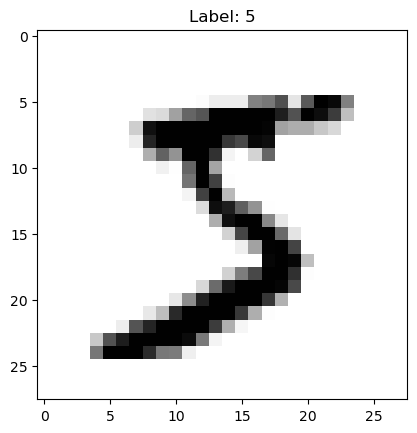

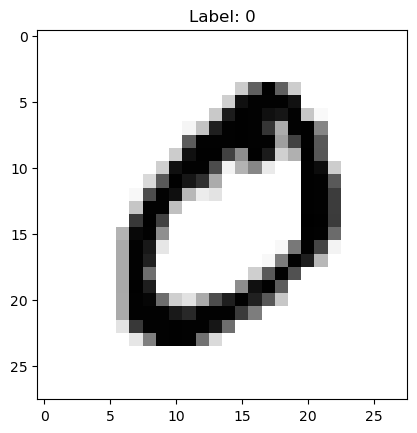

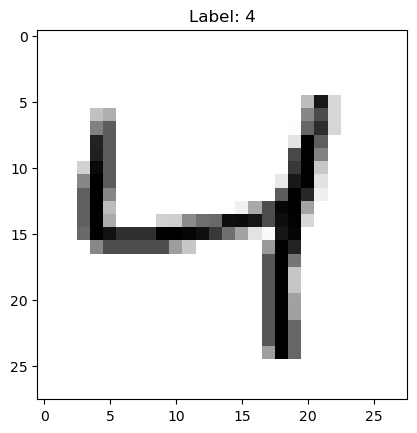

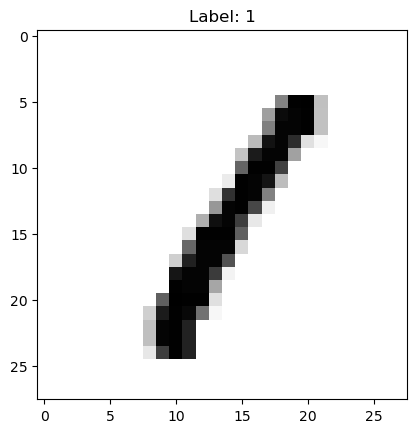

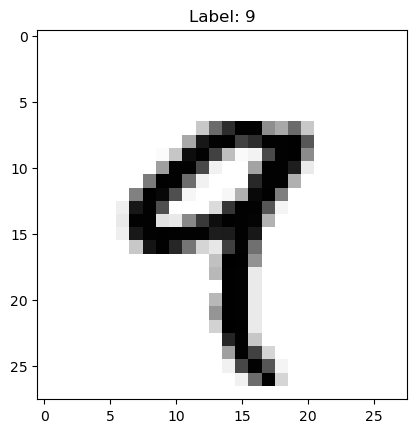

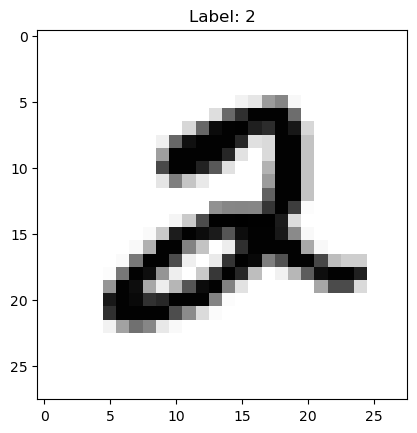

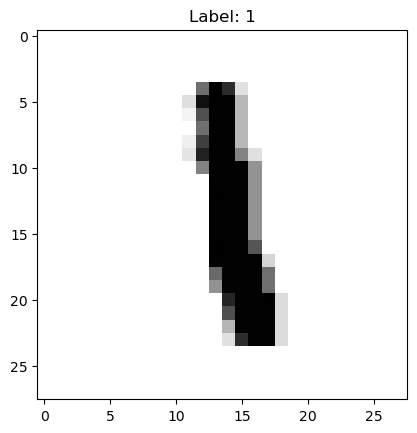

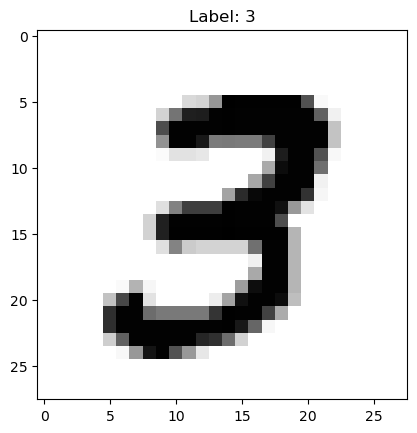

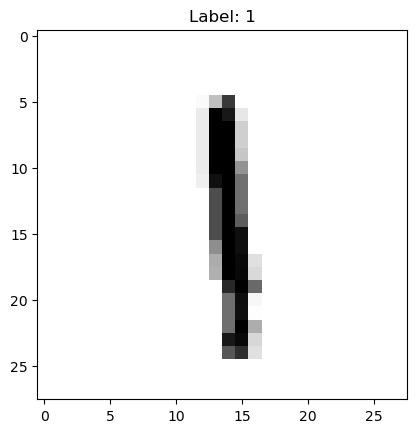

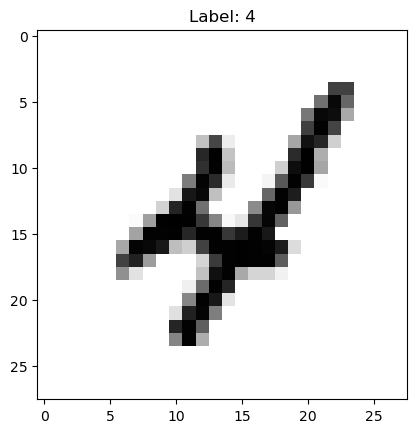

In [98]:
for i in range(10):
    plot_input_img(i)

In [100]:
# Pre-process the images

# Normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Re-shape/expand the dimensions of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [102]:
X_train.shape

(60000, 28, 28, 1)

In [104]:
y_train 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [106]:
y_train.shape

(60000,)

In [108]:
# convert y_train and y_test to onehot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [112]:
model = Sequential()

model.add(Conv2D( 32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

# To prevent overfitting
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [114]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [138]:
# Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

# Model cModelCheckpoint
mc = ModelCheckpoint('./bestmodel.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

# Callbacks
cb= [es, mc]

In [140]:
his = model.fit(X_train, y_train, epochs=50, validation_split=0.3, callbacks=cb)

Epoch 1/50
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9989 - loss: 0.0033
Epoch 1: val_accuracy improved from -inf to 0.98989, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9899 - val_loss: 0.0589
Epoch 2/50
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9985 - loss: 0.0040
Epoch 2: val_accuracy improved from 0.98989 to 0.99128, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9985 - loss: 0.0040 - val_accuracy: 0.9913 - val_loss: 0.0524
Epoch 3/50
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9986 - loss: 0.0036
Epoch 3: val_accuracy did not improve from 0.99128
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9986 - loss: 0.0036 - val_accuracy: 0.9893 - val_loss: 0.0634
Epoch 4/50
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9978 - loss: 0.0049
Epoch 4: val_accuracy did not improve from 0.99128
1313/1313

In [155]:
model_S = keras.models.load_model('.//bestmodel.keras')

In [157]:
score = model_S.evaluate(X_test, y_test)

# score[0] returns the loss
print(f"the model accuracy is {score[1]} ")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0492
the model accuracy is 0.9912999868392944 
